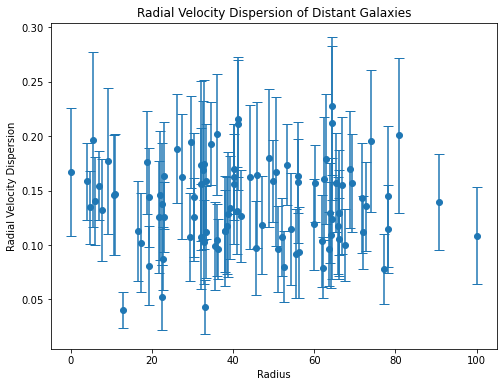

Velocity Dispersion: 258.841755183849 km/s
Mass of the Galaxy: [3.12664336e+09 3.12664336e+09 3.12664336e+09 3.12664336e+09
 3.12664336e+09 3.12664336e+09 3.12664336e+09 3.12664336e+09
 3.12664336e+09 3.12664336e+09 3.12664336e+09 3.12664336e+09
 3.12664336e+09 3.12664336e+09 3.12664336e+09 3.12664336e+09
 3.12664336e+09 3.21582390e+09 3.21582390e+09 3.21582390e+09
 3.21582390e+09 3.21582390e+09 3.21582390e+09 3.21582390e+09
 3.21582390e+09 3.21582390e+09 3.21582390e+09 3.21582390e+09
 3.21582390e+09 3.21582390e+09 3.21582390e+09 3.21582390e+09
 3.21582390e+09 1.71011098e+09 1.71011098e+09 1.71011098e+09
 1.71011098e+09 1.71011098e+09 1.71011098e+09 5.67578271e+09
 5.67578271e+09 5.67578271e+09 5.67578271e+09 5.67578271e+09
 5.67578271e+09 5.67578271e+09 5.67578271e+09 5.67578271e+09
 5.67578271e+09 5.67578271e+09 2.04503521e+09 2.04503521e+09
 2.04503521e+09 2.04503521e+09 2.04503521e+09 2.04503521e+09
 2.04503521e+09 2.04503521e+09 2.04503521e+09 2.04503521e+09
 2.04503521e+09 2.0450

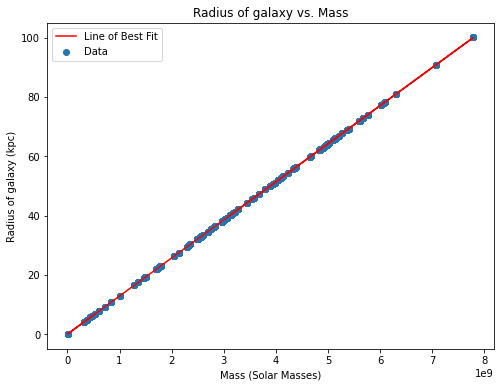

Equation of the line of best fit: Mass = 77869658.56 * Radius + 0.00


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  7 20:07:44 2024

@author: anikamondal
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the data from the CSV file
df = pd.read_csv('/Users/anikamondal/Desktop/combined_data_distant.csv')
r = df['Radius'].values
v = df['RadialVelocity'].values

# Initialize arrays to store the radial velocity dispersion and the number of data points at each radius
dispersions = []
counts = []

# Calculate radial velocity dispersion for each unique radius
unique_radii = np.unique(r)
for radius in unique_radii:
    mask = (r == radius)
    velocities_at_radius = v[mask]
    dispersion = np.std(velocities_at_radius)  # Calculate standard deviation as radial velocity dispersion
    dispersions.append(dispersion)
    counts.append(len(velocities_at_radius))

# Convert lists to arrays
dispersions = np.array(dispersions)
counts = np.array(counts)

# Plot the radial velocity dispersion as a function of radius
plt.figure(figsize=(8, 6))
plt.errorbar(unique_radii, dispersions, yerr=dispersions/np.sqrt(counts), fmt='o', capsize=5)
plt.xlabel('Radius')
plt.ylabel('Radial Velocity Dispersion')
plt.title('Radial Velocity Dispersion of Distant Galaxies')
plt.show()

#calculating mass from virial theorem using radii
df = pd.read_csv('/Users/anikamondal/Desktop/combined_data_distant.csv')
v = df['RadialVelocity'].values
average_velocity = np.mean(v)
velocity_dispersion = np.sqrt(np.mean((v - average_velocity)**2))

print(f"Velocity Dispersion: {velocity_dispersion} km/s")


R = df['Radius'].values  # Radius in kpc


# Constants
G = 4.302e-3  # Gravitational constant in pc * (km/s)^2 / Msun


# Calculate the mass
mass = 5 * velocity_dispersion**2 * R / G  # in solar masses

print(f"Mass of the Galaxy: {mass} Solar Masses")

# Perform linear regression to get the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(r, mass)
line = slope * r + intercept

# Plot the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(mass, r, marker='o', label='Data')
plt.plot(line, r, color='red', label='Line of Best Fit')
plt.xlabel('Mass (Solar Masses)')
plt.ylabel('Radius of galaxy (kpc)')
plt.title('Radius of galaxy vs. Mass')
plt.legend()
plt.show()

# Print the equation of the line of best fit
print(f"Equation of the line of best fit: Mass = {slope:.2f} * Radius + {intercept:.2f}")

